In [176]:
import pandas as pd

old_car_data_frame = pd.read_csv('car_all_data_frame.csv', index_col=None, encoding='cp949',
                                 )

old_car_data_frame.head()

car_name car_company car_number car_color  year   load_km  \
0     TheSUV스포티지1.7디젤2WD트렌디          기아    61호1562        흰색  2017  97,974km   
1           올뉴투싼디젤1.72WD스타일          현대    13고4535        회색  2017  41,322km   
2           코나1.6가솔린터보2WD모던          현대    24하6506        흰색  2019   3,358km   
3  더뉴그랜드스타렉스2.5디젤2WD스마트12인승          현대    75하8962        흰색  2018   2,894km   
4        올뉴쏘렌토2WD2.0노블레스5인승          기아    59하9795        쥐색  2017  72,258km   

   money        date car_mode  
0  1,440  2020.05.13       자동  
1  1,620  2020.05.13       자동  
2  1,880  2020.05.13       자동  
3  2,350  2020.05.13       자동  
4  2,150  2020.05.13       자동

In [177]:
#데이터 값 정제하기
old_car_data_frame.iloc[:,-4] = old_car_data_frame.iloc[:,-4].str.replace(",","")
old_car_data_frame.iloc[:,-4] = old_car_data_frame.iloc[:,-4].str.replace("km","")
old_car_data_frame.iloc[:,-4] = pd.to_numeric(old_car_data_frame.iloc[:,-4])

old_car_data_frame.loc[:,'money'] = old_car_data_frame.loc[:,'money'].str.replace(",","")
old_car_data_frame.loc[:,'money'] = pd.to_numeric(old_car_data_frame.loc[:,'money'])

In [178]:
import numpy as np
#기초 통계량 구하기.
old_car_data_frame.describe(include=[np.number])

year       load_km         money
count  7500.000000  7.500000e+03   7500.000000
mean   2014.776133  8.963506e+04   1596.566267
std       3.298404  6.060878e+04   1160.030987
min    1999.000000  2.000000e+00      0.000000
25%    2013.000000  4.637700e+04    790.000000
50%    2016.000000  8.070400e+04   1370.000000
75%    2017.000000  1.204748e+05   2030.000000
max    2020.000000  1.400000e+06  11300.000000

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    old_car_data_frame.loc[:,['year','load_km','car_company','car_color','car_mode']], old_car_data_frame.loc[:,'money'],random_state=0
)

print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)

print("X_test 크기 : ", X_test.shape)
print("y_test 크기 : ", y_test.shape)

X_train 크기 :  (5625, 5)
y_train 크기 :  (5625,)
X_test 크기 :  (1875, 5)
y_test 크기 :  (1875,)


In [180]:
# old_car_df = pd.DataFrame(X_train, columns=['year','load_km'])
# old_car_df['money'] = y_train
# pd.plotting.scatter_matrix(old_car_df, c=y_train, figsize=(15,15), marker='o',
#                            hist_kwds={'bins': 20}, s=60, alpha=8)

In [181]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    old_car_data_frame.loc[:,['year','load_km']], old_car_data_frame.loc[:,'money'],random_state=0
)

old_car_lr = LinearRegression().fit(X_train,y_train)

print("old_car_lr.coef : ", old_car_lr.coef_)
print("old_car_lr.intercept_ : ", old_car_lr.intercept_)

old_car_lr.coef :  [ 1.67855183e+02 -2.59116610e-03]
old_car_lr.intercept_ :  -336365.2030325925


In [182]:
print("훈련 세트 점수 : {:.2f}".format(old_car_lr.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(old_car_lr.score(X_test,y_test)))

훈련 세트 점수 : 0.32
테스트 세트 점수 : 0.32


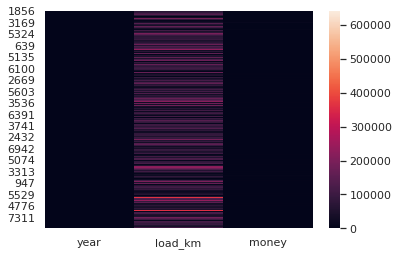

In [183]:
import seaborn as sns

sns.heatmap(old_car_df)

In [184]:
# import matplotlib.pyplot as plt
# 
# sns.set(style="whitegrid")
# 
# f, ax = plt.subplot(figsize=(10,10))
# sns.despine(f, left=True, bottom=True)
# 
# sns.scatterplot(x="money",y='load_km', hue="species", style="species",s=100,
#                 data=old_car_lr)